In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('user_data_anonymized.csv')
df = df.drop([df.columns[0]],axis=1)

In [3]:
df.head()

,user_id,username,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,type,ntrial,timestamp
0,0,User_1,0.032867,-0.011398,-0.989441,0.001340,-0.004726,0.000653,0,3,2018-03-15 21:49:02.853
1,0,User_1,0.036270,-0.646866,-0.749863,0.001340,-0.004726,0.000653,0,3,2018-03-15 21:49:02.876
2,0,User_1,0.036270,-0.646866,-0.749863,0.001340,-0.004726,0.000653,0,3,2018-03-15 21:49:02.903
3,0,User_1,-0.061005,-0.691040,-0.748917,0.320133,0.039149,-0.234852,0,3,2018-03-15 21:49:03.052
4,0,User_1,-0.140427,-0.746765,-0.741333,0.381414,0.046364,-0.343133,0,3,2018-03-15 21:49:03.074


In [16]:
cols = ['sensor_type','trial','name','type','set']
SEQ_LENGTH = 303
WIN_LENGTH = 101
for i in range(int(SEQ_LENGTH/3)):
    cols.append('x'+str(i))
moving_window_x = pd.DataFrame(columns = cols)

label = pd.DataFrame(columns = ['sensor_type','set','type1','type2','type3','type4'])
s_index = 0
for trial in np.sort(df['ntrial'].unique()):
    nt = df.loc[df['ntrial'] == trial]

    names = df['username'].unique()
    for name in names:
        n = nt.loc[nt['username'] == name]
        
        types = np.array([1,2,3,4])
        for type_ in types:
            t = n.loc[n['type'] == type_]
            
            sensors = t.columns[2:8]
            for sensor in sensors:  
                s = t
                
                if trial == 5: text="test"
                else: text="train"
                if s[sensor].values.shape[0] > SEQ_LENGTH:
                    values = s[sensor].values[:SEQ_LENGTH].astype(float)
                elif s[sensor].values.shape[0] <= SEQ_LENGTH:
                    values = np.append(s[sensor].values[:].astype(float),
                                       np.array([s[sensor].values[-1].astype(float) 
                                       for i in range(SEQ_LENGTH-s[sensor].values.shape[0])]))
                for seq in range(3):
                    row = np.array([sensor])
                    row = np.append(row,[trial])
                    row = np.append(row,[name])
                    row = np.append(row,[type_])
                    row = np.append(row,[text])
                    
                    row = np.append(row,values[seq*WIN_LENGTH:(seq+1)*WIN_LENGTH])
                    moving_window_x = moving_window_x.append(pd.DataFrame([row],columns=moving_window_x.columns))

                    row_label = np.array([sensor])
                    row_label = np.append(row_label,[text])
                    row_label = np.append(row_label,np.zeros((types.shape[0],)))
                    row_label[type_+1] = 1.0
                    label = label.append(pd.DataFrame([row_label],columns=label.columns))
                
    s_index += s[sensor].shape[0]

In [17]:
mdf = moving_window_x
mdf.head()

,sensor_type,trial,name,type,set,x0,x1,x2,x3,x4,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100
0,acc_x,1,User_1,1,train,0.197403,0.197403,0.08113098,0.09988403,0.0811615,...,0.12043759999999999,0.1289062,0.1297302,0.1239319,0.1253662,0.1318054,0.1278381,0.1253815,0.13331600000000002,0.1303101
0,acc_x,1,User_1,1,train,0.1239014,0.1248779,0.1244202,0.1229095,0.12974549999999999,...,-0.47042849999999997,-0.2918091,-0.29493709999999995,-0.36399840000000006,-0.29225159999999994,-0.2948914,-0.3021393,-0.2113953,-0.20169070000000003,-0.20317079999999998
0,acc_x,1,User_1,1,train,-0.14505,-0.12800599999999998,-0.1059113,-0.05352783,-0.01895142,...,-0.01829529,0.002685547,0.002685547,0.002685547,0.002685547,0.002685547,0.002685547,0.002685547,0.002685547,0.002685547
0,acc_y,1,User_1,1,train,-0.9118347,-0.9118347,-0.9439086999999999,-0.970932,-0.9682465,...,-0.9945068000000001,-0.9920502,-0.9850921999999999,-0.9906005999999999,-0.9827728000000001,-0.9803009,-0.9905243,-0.9939728000000001,-0.9856566999999999,-0.9837036
0,acc_y,1,User_1,1,train,-0.9847412,-0.9891052,-0.9867096,-0.9900969999999999,-0.9855804,...,-0.8878784,-0.9207764,-0.8725433000000001,-0.8675385,-0.9713135,-0.9347992,-0.9234009,-0.9428101000000001,-0.9537201,-0.9455565999999999


In [18]:
moving_window_x['index'] = [i for i in range(moving_window_x.shape[0])]
moving_window_x = moving_window_x.set_index(['index'])

label['index'] = [i for i in range(label.shape[0])]
label = label.set_index(['index'])

In [19]:
moving_window_x.shape

(720, 106)

In [20]:
moving_window_x.head()

,sensor_type,trial,name,type,set,x0,x1,x2,x3,x4,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100
index,,,,,,,,,,,,,,,,,,,,,
0,acc_x,1,User_1,1,train,0.197403,0.197403,0.08113098,0.09988403,0.0811615,...,0.12043759999999999,0.1289062,0.1297302,0.1239319,0.1253662,0.1318054,0.1278381,0.1253815,0.13331600000000002,0.1303101
1,acc_x,1,User_1,1,train,0.1239014,0.1248779,0.1244202,0.1229095,0.12974549999999999,...,-0.47042849999999997,-0.2918091,-0.29493709999999995,-0.36399840000000006,-0.29225159999999994,-0.2948914,-0.3021393,-0.2113953,-0.20169070000000003,-0.20317079999999998
2,acc_x,1,User_1,1,train,-0.14505,-0.12800599999999998,-0.1059113,-0.05352783,-0.01895142,...,-0.01829529,0.002685547,0.002685547,0.002685547,0.002685547,0.002685547,0.002685547,0.002685547,0.002685547,0.002685547
3,acc_y,1,User_1,1,train,-0.9118347,-0.9118347,-0.9439086999999999,-0.970932,-0.9682465,...,-0.9945068000000001,-0.9920502,-0.9850921999999999,-0.9906005999999999,-0.9827728000000001,-0.9803009,-0.9905243,-0.9939728000000001,-0.9856566999999999,-0.9837036
4,acc_y,1,User_1,1,train,-0.9847412,-0.9891052,-0.9867096,-0.9900969999999999,-0.9855804,...,-0.8878784,-0.9207764,-0.8725433000000001,-0.8675385,-0.9713135,-0.9347992,-0.9234009,-0.9428101000000001,-0.9537201,-0.9455565999999999


In [21]:
moving_window_x.groupby(['set']).size().to_frame()

,0
set,
test,144
train,576


In [22]:
train_len = int(moving_window_x.loc[moving_window_x['set'] == 'train'].shape[0]/6)
test_len = int(moving_window_x.loc[moving_window_x['set'] == 'test'].shape[0]/6)

In [23]:
x_train = np.zeros((train_len,WIN_LENGTH,6))
y_train = np.zeros((train_len,4))

x_test = np.zeros((test_len,WIN_LENGTH,6))
y_test = np.zeros((test_len,4))

In [24]:
shuffle_data = np.zeros((train_len+test_len,WIN_LENGTH,6+4))

In [30]:
for i,sensor in enumerate(moving_window_x['sensor_type'].unique()):
    s_train = moving_window_x.loc[moving_window_x['sensor_type'] == sensor]
    s_train = s_train.loc[s_train['set'] == "train"]
    s_test = moving_window_x.loc[moving_window_x['sensor_type'] == sensor]
    s_test = s_test.loc[s_test['set'] == "test"]

    x_train[:,:,i] = s_train.drop(['sensor_type','trial','name','type','set'],axis=1)
    x_test[:,:,i] = s_test.drop(['sensor_type','trial','name','type','set'],axis=1)
    if i == 0:
        l = label.loc[label['sensor_type'] == sensor]
        l_train = l.loc[l['set'] == "train"]
        l_test = l.loc[l['set'] == "test"]
        
        y_train[:,:] = l_train.drop(['sensor_type','set'],axis=1)
        y_test[:,:] = l_test.drop(['sensor_type','set'],axis=1)

In [31]:
y_train_ = np.zeros((train_len,WIN_LENGTH,4))
y_train_[:,0,:] = y_train

y_test_ = np.zeros((test_len,WIN_LENGTH,4))
y_test_[:,0,:] = y_test

shuffle_data[:train_len,:,:6] = x_train
shuffle_data[:train_len,:,6:] = y_train_

shuffle_data[-test_len:,:,:6] = x_test
shuffle_data[-test_len:,:,6:] = y_test_


while True:
    np.random.shuffle(shuffle_data)

    x_train = shuffle_data[:train_len,:,:6]
    x_test = shuffle_data[-test_len:,:,:6]
    y_train = shuffle_data[:train_len,0,6:].reshape(train_len,4)
    y_test = shuffle_data[-test_len:,0,6:].reshape(test_len,4)
    if np.sum(y_test[:,0]) == 6:
        if np.sum(y_test[:,1]) == 6:
            if np.sum(y_test[:,2]) == 6:
                if np.sum(y_test[:,3]) == 6:
                    break

In [32]:
print("x_train.shape: "+str(x_train.shape))
print("y_train.shape: "+str(y_train.shape))
print("x_test.shape: "+str(x_test.shape))
print("y_test.shape: "+str(y_test.shape))

x_train.shape: (96, 101, 6)
y_train.shape: (96, 4)
x_test.shape: (24, 101, 6)
y_test.shape: (24, 4)


In [33]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Conv1D, Dropout
from keras.callbacks import History
from keras.optimizers import Adam
import seaborn as sn
import time

In [56]:
batch_size = 12
timesteps = WIN_LENGTH
data_dim = 6

model = Sequential()
model.add(Conv1D(filters=6,
                 kernel_size=12,
                 strides=1,
                 batch_input_shape=(batch_size,timesteps, data_dim)))
model.add(Dropout(0.1))
model.add(Conv1D(filters=6,
                 kernel_size=12,
                 strides=2))
model.add(Dropout(0.1))
model.add(LSTM(24,dropout=0.25, return_sequences=True))
model.add(LSTM(18,dropout=0.25))
model.add(Dense(12,activation='tanh'))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
            optimizer=Adam(lr=0.0001),
            metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_15 (Conv1D)           (12, 90, 6)               438       
_________________________________________________________________
dropout_13 (Dropout)         (12, 90, 6)               0         
_________________________________________________________________
conv1d_16 (Conv1D)           (12, 40, 6)               438       
_________________________________________________________________
dropout_14 (Dropout)         (12, 40, 6)               0         
_________________________________________________________________
lstm_15 (LSTM)               (12, 40, 24)              2976      
_________________________________________________________________
lstm_16 (LSTM)               (12, 18)                  3096      
_________________________________________________________________
dense_17 (Dense)             (12, 12)                  228       
__________

In [57]:
st = time.time()
history = model.fit(x_train, y_train,
        batch_size=batch_size, epochs=800, shuffle=False,
        validation_data=(x_test, y_test),verbose=1)
ft = time.time()
print("%d secs for training"%(ft-st))

Train on 96 samples, validate on 24 samples
Epoch 1/800
96/96 [==============================] - 3s - loss: 1.3993 - acc: 0.3021 - val_loss: 1.3937 - val_acc: 0.2500
Epoch 2/800
96/96 [==============================] - 0s - loss: 1.3833 - acc: 0.2188 - val_loss: 1.3923 - val_acc: 0.2500
Epoch 3/800
96/96 [==============================] - 0s - loss: 1.3968 - acc: 0.2292 - val_loss: 1.3912 - val_acc: 0.2500
Epoch 4/800
96/96 [==============================] - 0s - loss: 1.3916 - acc: 0.2500 - val_loss: 1.3905 - val_acc: 0.2500
Epoch 5/800
96/96 [==============================] - 0s - loss: 1.3880 - acc: 0.2708 - val_loss: 1.3897 - val_acc: 0.2500
Epoch 6/800
96/96 [==============================] - 0s - loss: 1.3919 - acc: 0.2812 - val_loss: 1.3888 - val_acc: 0.2500
Epoch 7/800
96/96 [==============================] - 0s - loss: 1.3790 - acc: 0.2396 - val_loss: 1.3882 - val_acc: 0.2083
Epoch 8/800
96/96 [==============================] - 0s - loss: 1.3836 - acc: 0.2708 - val_loss: 1.387

96/96 [==============================] - 0s - loss: 1.3259 - acc: 0.3750 - val_loss: 1.3534 - val_acc: 0.4583
Epoch 68/800
96/96 [==============================] - 0s - loss: 1.3398 - acc: 0.3229 - val_loss: 1.3530 - val_acc: 0.4583
Epoch 69/800
96/96 [==============================] - 0s - loss: 1.3223 - acc: 0.3750 - val_loss: 1.3526 - val_acc: 0.4583
Epoch 70/800
96/96 [==============================] - 0s - loss: 1.3159 - acc: 0.3542 - val_loss: 1.3520 - val_acc: 0.4583
Epoch 71/800
96/96 [==============================] - 0s - loss: 1.3304 - acc: 0.3958 - val_loss: 1.3513 - val_acc: 0.4583
Epoch 72/800
96/96 [==============================] - 0s - loss: 1.3207 - acc: 0.3750 - val_loss: 1.3507 - val_acc: 0.4583
Epoch 73/800
96/96 [==============================] - 0s - loss: 1.3245 - acc: 0.3854 - val_loss: 1.3500 - val_acc: 0.4583
Epoch 74/800
96/96 [==============================] - 0s - loss: 1.3071 - acc: 0.3437 - val_loss: 1.3494 - val_acc: 0.4583
Epoch 75/800
96/96 [=========

96/96 [==============================] - 0s - loss: 1.0977 - acc: 0.5104 - val_loss: 1.2245 - val_acc: 0.4583
Epoch 134/800
96/96 [==============================] - 0s - loss: 1.1046 - acc: 0.4896 - val_loss: 1.2261 - val_acc: 0.4583
Epoch 135/800
96/96 [==============================] - 0s - loss: 1.0870 - acc: 0.5000 - val_loss: 1.2293 - val_acc: 0.3750
Epoch 136/800
96/96 [==============================] - 0s - loss: 1.0498 - acc: 0.4896 - val_loss: 1.2207 - val_acc: 0.4583
Epoch 137/800
96/96 [==============================] - 0s - loss: 1.1058 - acc: 0.5000 - val_loss: 1.2096 - val_acc: 0.4583
Epoch 138/800
96/96 [==============================] - 0s - loss: 1.0384 - acc: 0.5729 - val_loss: 1.2041 - val_acc: 0.4583
Epoch 139/800
96/96 [==============================] - 0s - loss: 1.0693 - acc: 0.5208 - val_loss: 1.1983 - val_acc: 0.4583
Epoch 140/800
96/96 [==============================] - 0s - loss: 1.0692 - acc: 0.5417 - val_loss: 1.1936 - val_acc: 0.4583
Epoch 141/800
96/96 [=

96/96 [==============================] - 0s - loss: 0.9185 - acc: 0.5417 - val_loss: 1.0248 - val_acc: 0.5000
Epoch 200/800
96/96 [==============================] - 0s - loss: 0.8839 - acc: 0.5521 - val_loss: 0.9810 - val_acc: 0.5417
Epoch 201/800
96/96 [==============================] - 0s - loss: 0.9216 - acc: 0.5313 - val_loss: 0.9691 - val_acc: 0.5417
Epoch 202/800
96/96 [==============================] - 0s - loss: 0.9433 - acc: 0.5312 - val_loss: 0.9655 - val_acc: 0.5417
Epoch 203/800
96/96 [==============================] - 0s - loss: 0.9046 - acc: 0.5312 - val_loss: 0.9772 - val_acc: 0.5417
Epoch 204/800
96/96 [==============================] - 0s - loss: 0.8841 - acc: 0.6042 - val_loss: 0.9852 - val_acc: 0.5417
Epoch 205/800
96/96 [==============================] - 0s - loss: 0.8893 - acc: 0.5521 - val_loss: 0.9907 - val_acc: 0.5417
Epoch 206/800
96/96 [==============================] - 0s - loss: 0.9128 - acc: 0.5104 - val_loss: 1.0016 - val_acc: 0.5000
Epoch 207/800
96/96 [=

96/96 [==============================] - 0s - loss: 0.8247 - acc: 0.5729 - val_loss: 0.9340 - val_acc: 0.6250
Epoch 266/800
96/96 [==============================] - 0s - loss: 0.8497 - acc: 0.5625 - val_loss: 0.9223 - val_acc: 0.6250
Epoch 267/800
96/96 [==============================] - 0s - loss: 0.8032 - acc: 0.6146 - val_loss: 0.9227 - val_acc: 0.6250
Epoch 268/800
96/96 [==============================] - 0s - loss: 0.8571 - acc: 0.5938 - val_loss: 0.9087 - val_acc: 0.6250
Epoch 269/800
96/96 [==============================] - 0s - loss: 0.8092 - acc: 0.6458 - val_loss: 0.9048 - val_acc: 0.6250
Epoch 270/800
96/96 [==============================] - 0s - loss: 0.8013 - acc: 0.5521 - val_loss: 0.9052 - val_acc: 0.6250
Epoch 271/800
96/96 [==============================] - 0s - loss: 0.8064 - acc: 0.5833 - val_loss: 0.9198 - val_acc: 0.6250
Epoch 272/800
96/96 [==============================] - 0s - loss: 0.8529 - acc: 0.6146 - val_loss: 0.9570 - val_acc: 0.6250
Epoch 273/800
96/96 [=

96/96 [==============================] - 0s - loss: 0.8103 - acc: 0.6250 - val_loss: 0.8854 - val_acc: 0.5417
Epoch 332/800
96/96 [==============================] - 0s - loss: 0.7618 - acc: 0.6146 - val_loss: 0.8897 - val_acc: 0.5417
Epoch 333/800
96/96 [==============================] - 0s - loss: 0.8008 - acc: 0.6354 - val_loss: 0.8945 - val_acc: 0.5417
Epoch 334/800
96/96 [==============================] - 0s - loss: 0.7731 - acc: 0.6250 - val_loss: 0.9109 - val_acc: 0.5417
Epoch 335/800
96/96 [==============================] - 0s - loss: 0.7931 - acc: 0.6250 - val_loss: 0.9237 - val_acc: 0.5417
Epoch 336/800
96/96 [==============================] - 0s - loss: 0.7865 - acc: 0.6771 - val_loss: 0.9247 - val_acc: 0.5417
Epoch 337/800
96/96 [==============================] - 0s - loss: 0.7611 - acc: 0.7188 - val_loss: 0.9428 - val_acc: 0.5417
Epoch 338/800
96/96 [==============================] - 0s - loss: 0.7906 - acc: 0.6458 - val_loss: 0.9205 - val_acc: 0.5417
Epoch 339/800
96/96 [=

96/96 [==============================] - 0s - loss: 0.7479 - acc: 0.6562 - val_loss: 0.9061 - val_acc: 0.5417
Epoch 398/800
96/96 [==============================] - 0s - loss: 0.7764 - acc: 0.6667 - val_loss: 0.8976 - val_acc: 0.5417
Epoch 399/800
96/96 [==============================] - 0s - loss: 0.7413 - acc: 0.6562 - val_loss: 0.8939 - val_acc: 0.5417
Epoch 400/800
96/96 [==============================] - 0s - loss: 0.7237 - acc: 0.6354 - val_loss: 0.8987 - val_acc: 0.5417
Epoch 401/800
96/96 [==============================] - 0s - loss: 0.7530 - acc: 0.6771 - val_loss: 0.9076 - val_acc: 0.5417
Epoch 402/800
96/96 [==============================] - 0s - loss: 0.7179 - acc: 0.6875 - val_loss: 0.9071 - val_acc: 0.5417
Epoch 403/800
96/96 [==============================] - 0s - loss: 0.7858 - acc: 0.5833 - val_loss: 0.9053 - val_acc: 0.5833
Epoch 404/800
96/96 [==============================] - 0s - loss: 0.7055 - acc: 0.6667 - val_loss: 0.8916 - val_acc: 0.5833
Epoch 405/800
96/96 [=

96/96 [==============================] - 0s - loss: 0.7431 - acc: 0.6354 - val_loss: 0.8552 - val_acc: 0.6250
Epoch 463/800
96/96 [==============================] - 0s - loss: 0.7115 - acc: 0.6562 - val_loss: 0.8587 - val_acc: 0.6250
Epoch 464/800
96/96 [==============================] - 0s - loss: 0.7025 - acc: 0.6667 - val_loss: 0.8709 - val_acc: 0.6250
Epoch 465/800
96/96 [==============================] - 0s - loss: 0.7432 - acc: 0.6771 - val_loss: 0.8756 - val_acc: 0.6250
Epoch 466/800
96/96 [==============================] - 0s - loss: 0.7327 - acc: 0.6146 - val_loss: 0.8702 - val_acc: 0.6250
Epoch 467/800
96/96 [==============================] - 0s - loss: 0.7424 - acc: 0.6563 - val_loss: 0.8910 - val_acc: 0.5833
Epoch 468/800
96/96 [==============================] - 0s - loss: 0.7363 - acc: 0.6875 - val_loss: 0.8995 - val_acc: 0.5833
Epoch 469/800
96/96 [==============================] - 0s - loss: 0.7049 - acc: 0.6354 - val_loss: 0.8884 - val_acc: 0.58330.63
Epoch 470/800
96/9

96/96 [==============================] - 0s - loss: 0.7150 - acc: 0.6979 - val_loss: 0.8871 - val_acc: 0.5833
Epoch 529/800
96/96 [==============================] - 0s - loss: 0.8128 - acc: 0.6250 - val_loss: 0.8785 - val_acc: 0.5833
Epoch 530/800
96/96 [==============================] - 0s - loss: 0.7393 - acc: 0.6562 - val_loss: 0.8796 - val_acc: 0.5833
Epoch 531/800
96/96 [==============================] - 0s - loss: 0.7248 - acc: 0.6146 - val_loss: 0.9045 - val_acc: 0.5833
Epoch 532/800
96/96 [==============================] - 0s - loss: 0.6377 - acc: 0.6979 - val_loss: 0.9122 - val_acc: 0.5833
Epoch 533/800
96/96 [==============================] - 0s - loss: 0.6577 - acc: 0.6875 - val_loss: 0.9095 - val_acc: 0.5833
Epoch 534/800
96/96 [==============================] - 0s - loss: 0.6393 - acc: 0.7292 - val_loss: 0.9124 - val_acc: 0.5833
Epoch 535/800
96/96 [==============================] - 0s - loss: 0.6868 - acc: 0.7083 - val_loss: 0.9196 - val_acc: 0.5833
Epoch 536/800
96/96 [=

96/96 [==============================] - 0s - loss: 0.6320 - acc: 0.7292 - val_loss: 0.8861 - val_acc: 0.6250
Epoch 595/800
96/96 [==============================] - 0s - loss: 0.6778 - acc: 0.7292 - val_loss: 0.8843 - val_acc: 0.6250
Epoch 596/800
96/96 [==============================] - 0s - loss: 0.6962 - acc: 0.6667 - val_loss: 0.8737 - val_acc: 0.6250
Epoch 597/800
96/96 [==============================] - 0s - loss: 0.6753 - acc: 0.7188 - val_loss: 0.8662 - val_acc: 0.6250
Epoch 598/800
96/96 [==============================] - 0s - loss: 0.6974 - acc: 0.6563 - val_loss: 0.8656 - val_acc: 0.6250
Epoch 599/800
96/96 [==============================] - 0s - loss: 0.6431 - acc: 0.7188 - val_loss: 0.8664 - val_acc: 0.6250
Epoch 600/800
96/96 [==============================] - 0s - loss: 0.6820 - acc: 0.6875 - val_loss: 0.8756 - val_acc: 0.6250
Epoch 601/800
96/96 [==============================] - 0s - loss: 0.6257 - acc: 0.7188 - val_loss: 0.8799 - val_acc: 0.6250
Epoch 602/800
96/96 [=

96/96 [==============================] - 0s - loss: 0.6193 - acc: 0.6875 - val_loss: 0.8785 - val_acc: 0.6250
Epoch 661/800
96/96 [==============================] - 0s - loss: 0.5559 - acc: 0.7708 - val_loss: 0.8832 - val_acc: 0.6250
Epoch 662/800
96/96 [==============================] - 0s - loss: 0.6485 - acc: 0.6979 - val_loss: 0.8825 - val_acc: 0.6250
Epoch 663/800
96/96 [==============================] - 0s - loss: 0.6569 - acc: 0.6979 - val_loss: 0.8892 - val_acc: 0.6250
Epoch 664/800
96/96 [==============================] - 0s - loss: 0.6110 - acc: 0.7083 - val_loss: 0.8991 - val_acc: 0.6250
Epoch 665/800
96/96 [==============================] - 0s - loss: 0.5952 - acc: 0.7396 - val_loss: 0.9088 - val_acc: 0.6250
Epoch 666/800
96/96 [==============================] - 0s - loss: 0.5864 - acc: 0.7500 - val_loss: 0.9215 - val_acc: 0.6250
Epoch 667/800
96/96 [==============================] - 0s - loss: 0.6543 - acc: 0.7083 - val_loss: 0.9170 - val_acc: 0.6250
Epoch 668/800
96/96 [=

96/96 [==============================] - 0s - loss: 0.5954 - acc: 0.7292 - val_loss: 0.9057 - val_acc: 0.6250
Epoch 727/800
96/96 [==============================] - 0s - loss: 0.6196 - acc: 0.7083 - val_loss: 0.9092 - val_acc: 0.6250
Epoch 728/800
96/96 [==============================] - 0s - loss: 0.5772 - acc: 0.7500 - val_loss: 0.9036 - val_acc: 0.6250
Epoch 729/800
96/96 [==============================] - 0s - loss: 0.5927 - acc: 0.7292 - val_loss: 0.8967 - val_acc: 0.6250
Epoch 730/800
96/96 [==============================] - 0s - loss: 0.6013 - acc: 0.6875 - val_loss: 0.9020 - val_acc: 0.6250
Epoch 731/800
96/96 [==============================] - 0s - loss: 0.5237 - acc: 0.7500 - val_loss: 0.9131 - val_acc: 0.6250
Epoch 732/800
96/96 [==============================] - 0s - loss: 0.6117 - acc: 0.6979 - val_loss: 0.9139 - val_acc: 0.6250
Epoch 733/800
96/96 [==============================] - 0s - loss: 0.6347 - acc: 0.6875 - val_loss: 0.9173 - val_acc: 0.6250
Epoch 734/800
96/96 [=

96/96 [==============================] - 0s - loss: 0.5507 - acc: 0.7187 - val_loss: 0.9324 - val_acc: 0.6250
Epoch 793/800
96/96 [==============================] - 0s - loss: 0.5083 - acc: 0.7917 - val_loss: 0.9277 - val_acc: 0.6250
Epoch 794/800
96/96 [==============================] - 0s - loss: 0.5981 - acc: 0.6979 - val_loss: 0.9258 - val_acc: 0.6250
Epoch 795/800
96/96 [==============================] - 0s - loss: 0.5551 - acc: 0.7292 - val_loss: 0.9335 - val_acc: 0.6250
Epoch 796/800
96/96 [==============================] - 0s - loss: 0.5368 - acc: 0.7500 - val_loss: 0.9418 - val_acc: 0.6250
Epoch 797/800
96/96 [==============================] - 0s - loss: 0.5852 - acc: 0.7187 - val_loss: 0.9408 - val_acc: 0.6250
Epoch 798/800
96/96 [==============================] - 0s - loss: 0.6221 - acc: 0.7188 - val_loss: 0.9257 - val_acc: 0.6250
Epoch 799/800
96/96 [==============================] - 0s - loss: 0.5500 - acc: 0.7500 - val_loss: 0.9341 - val_acc: 0.6250
Epoch 800/800
96/96 [=

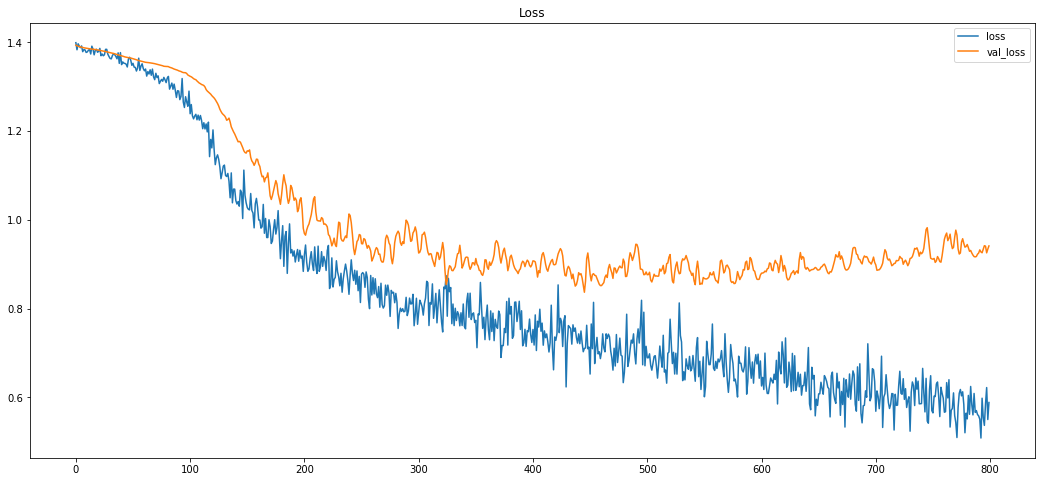

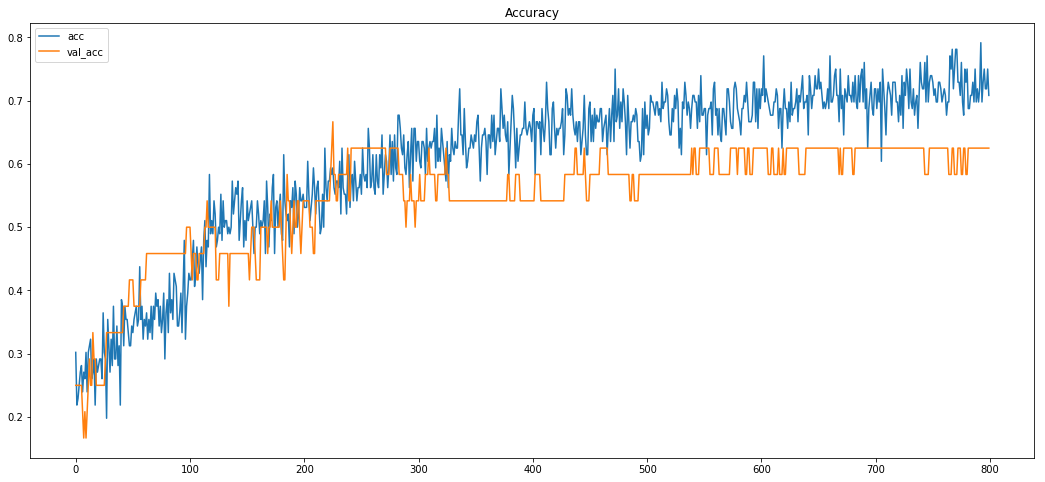

In [58]:
plt.figure(figsize=(18,8))
plt.plot(history.history['loss'],label="loss")
plt.plot(history.history['val_loss'],label="val_loss")
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(18,8))
plt.plot(history.history['acc'],label="acc")
plt.plot(history.history['val_acc'],label="val_acc")
plt.title("Accuracy")
plt.legend()
plt.show()

In [0]:
predictions = np.zeros((1,4))
predictions = np.concatenate((predictions,model.predict(x_test[:,:,:])),axis=0)
predictions = predictions[1:]

true_values = [1+np.where(i == 1)[0][0] for i in y_test]

import seaborn as sn
df_cm = pd.DataFrame(predictions.T, index = [1,2,3,4],
                columns = true_values)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.title("Accuracy: %.2f"%(history.history['val_acc'][-1]))
plt.show()